In [1]:
import numpy as np
import math
import pandas
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, SimpleRNN, LSTM, Flatten
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
def mmean(arr):
    sr = 0
    c = 0
    for i in arr:
        sr += i
        c += 1
    return sr/c

In [3]:
def trans_to_softmax(val, shape):
    buf = [0 for i in range(shape)]
    buf[val] = 1
    return buf

In [4]:
from random import randint as randint
def randcolor(n):
    buf = [str('#' + str(randint(10,99)) + '' + str(randint(10,99)) + ''+ str(randint(10,99))) for i in range(n)]
    return buf

Создание выборки по углам

In [5]:
def create_tg_viborka(arr):
    tg_a_p = []
    for i in arr:
        buf = []
        for c in range(len(i) - 1):
            buf.append(math.atan( ( i[c] - i[len(i)-1] ) / (len(i) - 1) ) )
        tg_a_p.append(buf)
    return tg_a_p

Создание выборки для кластеризации

In [6]:
def create_viborka(start, arr):
    arr_sr_t = []
    for i in range(start, len(arr)+1):
        arr_sr_t.append(arr[i - start:i])
    return arr_sr_t

Визуализация результатов класстеризации

In [7]:
def visualize(n_clust, predictions, arr, file_name = 'ind.png', sh = False):

    colors = randcolor(n_clust)

    not_train = len(arr) - len(predictions)
    
    
    for i in range(len(predictions)):
        color = predictions[i]
        val = arr[i + not_train]
        plt.scatter(i + not_train, val, c = colors[color])
        
    plt.plot(arr)
    if(sh):
        plt.show()
    plt.savefig(file_name)
    

Чиатем файл 2018 года и составляем список температур

In [8]:
d = pandas.read_excel('2018.xlsx', engine='openpyxl')
temp = []
buf = []
c = 0
for i in d['T']:
  buf.append(i)
  c += 1
  if c == 8:
    temp.append(buf)
    buf = []
    c = 0

Список средних значений в пачке

In [9]:
def mean_arr(arr):
    sr_temp = []
    for i in arr:
        sr_temp.append(mmean(i))
    return sr_temp

In [10]:
sr_temp = mean_arr(temp)

Выборка для класстеризации, количестов кластеров, сколько элементов в пачке для выборки

In [11]:
clusters__ = 8
in_vibor__ = 6

x_train = create_viborka(in_vibor__, sr_temp)
x_tg_train = create_tg_viborka(x_train)

Создание модели для класстеризации, ее обучение и прогнозировние

In [12]:
len(sr_temp)

365

In [13]:
k_mean_model = KMeans(n_clusters = clusters__)
k_mean_model.fit(x_tg_train)
predictions = k_mean_model.predict(x_tg_train)

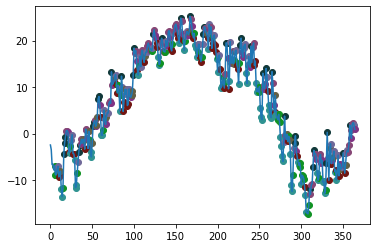

<Figure size 432x288 with 0 Axes>

In [14]:
visualize(clusters__,predictions,  sr_temp , sh = True)

Модель определяющая какой из кластеров будет после предыдущих N кластеров

Формирование обучающей выборки для модели предсказания кластера

In [15]:
size_of_vib = in_vibor__ - 1

x_train_cluster = []
y_train_cluster = []
for i in range(size_of_vib, len(predictions)):
    y_train_cluster.append(trans_to_softmax(predictions[i], clusters__))


for i in range(len(predictions) - size_of_vib):
    buf = [] 
    for j in range(i, i+size_of_vib):
        buf.append(float(predictions[j]))
    x_train_cluster.append(buf)

In [16]:
x_train_cluster

[[1.0, 1.0, 1.0, 4.0, 4.0],
 [1.0, 1.0, 4.0, 4.0, 3.0],
 [1.0, 4.0, 4.0, 3.0, 3.0],
 [4.0, 4.0, 3.0, 3.0, 7.0],
 [4.0, 3.0, 3.0, 7.0, 5.0],
 [3.0, 3.0, 7.0, 5.0, 5.0],
 [3.0, 7.0, 5.0, 5.0, 1.0],
 [7.0, 5.0, 5.0, 1.0, 0.0],
 [5.0, 5.0, 1.0, 0.0, 0.0],
 [5.0, 1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 2.0],
 [0.0, 0.0, 0.0, 2.0, 2.0],
 [0.0, 0.0, 2.0, 2.0, 6.0],
 [0.0, 2.0, 2.0, 6.0, 3.0],
 [2.0, 2.0, 6.0, 3.0, 5.0],
 [2.0, 6.0, 3.0, 5.0, 1.0],
 [6.0, 3.0, 5.0, 1.0, 4.0],
 [3.0, 5.0, 1.0, 4.0, 4.0],
 [5.0, 1.0, 4.0, 4.0, 3.0],
 [1.0, 4.0, 4.0, 3.0, 3.0],
 [4.0, 4.0, 3.0, 3.0, 5.0],
 [4.0, 3.0, 3.0, 5.0, 5.0],
 [3.0, 3.0, 5.0, 5.0, 5.0],
 [3.0, 5.0, 5.0, 5.0, 1.0],
 [5.0, 5.0, 5.0, 1.0, 4.0],
 [5.0, 5.0, 1.0, 4.0, 0.0],
 [5.0, 1.0, 4.0, 0.0, 0.0],
 [1.0, 4.0, 0.0, 0.0, 2.0],
 [4.0, 0.0, 0.0, 2.0, 2.0],
 [0.0, 0.0, 2.0, 2.0, 6.0],
 [0.0, 2.0, 2.0, 6.0, 7.0],
 [2.0, 2.0, 6.0, 7.0, 7.0],
 [2.0, 6.0, 7.0, 7.0, 3.0],
 [6.0, 7.0, 7.0, 3.0, 2.0],
 [7.0, 7.0, 3.0, 2.0, 2.0],
 [7.0, 3.0, 2.0, 2.0

Модель

In [17]:
model = keras.Sequential()
model.add(Dense(input_dim = size_of_vib, units=80, activation='tanh')) 
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units = clusters__, activation='softmax'))

model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
info = model.fit(x_train_cluster, y_train_cluster, epochs = 300)

Epoch 1/300
12/12 [==============================] - 1s 2ms/step - loss: 2.1660 - accuracy: 0.1250 
Epoch 2/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9225 - accuracy: 0.2412
Epoch 3/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9519 - accuracy: 0.2060
Epoch 4/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9504 - accuracy: 0.2339
Epoch 5/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9005 - accuracy: 0.2080
Epoch 6/300
12/12 [==============================] - 0s 1ms/step - loss: 1.8658 - accuracy: 0.2798
Epoch 7/300
12/12 [==============================] - 0s 1ms/step - loss: 1.8712 - accuracy: 0.2182
Epoch 8/300
12/12 [==============================] - 0s 1ms/step - loss: 1.9057 - accuracy: 0.2364
Epoch 9/300
12/12 [==============================] - 0s 1ms/step - loss: 1.8758 - accuracy: 0.2564
Epoch 10/300
12/12 [==============================] - 0s 1ms/step - loss: 1.8730 - accuracy: 0.2468
Epoch 11

12/12 [==============================] - 0s 997us/step - loss: 1.3556 - accuracy: 0.5017
Epoch 83/300
12/12 [==============================] - 0s 997us/step - loss: 1.3846 - accuracy: 0.4688
Epoch 84/300
12/12 [==============================] - 0s 907us/step - loss: 1.3507 - accuracy: 0.4621
Epoch 85/300
12/12 [==============================] - 0s 907us/step - loss: 1.3405 - accuracy: 0.4568
Epoch 86/300
12/12 [==============================] - 0s 997us/step - loss: 1.3086 - accuracy: 0.5024
Epoch 87/300
12/12 [==============================] - 0s 997us/step - loss: 1.3097 - accuracy: 0.5113
Epoch 88/300
12/12 [==============================] - 0s 907us/step - loss: 1.2793 - accuracy: 0.5106
Epoch 89/300
12/12 [==============================] - 0s 997us/step - loss: 1.3563 - accuracy: 0.4673
Epoch 90/300
12/12 [==============================] - 0s 997us/step - loss: 1.3423 - accuracy: 0.4636
Epoch 91/300
12/12 [==============================] - 0s 997us/step - loss: 1.2861 - accuracy: 

12/12 [==============================] - 0s 997us/step - loss: 0.8205 - accuracy: 0.6908
Epoch 163/300
12/12 [==============================] - 0s 1ms/step - loss: 0.8191 - accuracy: 0.7093
Epoch 164/300
12/12 [==============================] - 0s 1ms/step - loss: 0.7846 - accuracy: 0.7082
Epoch 165/300
12/12 [==============================] - 0s 1ms/step - loss: 0.8223 - accuracy: 0.6822
Epoch 166/300
12/12 [==============================] - 0s 1ms/step - loss: 0.7896 - accuracy: 0.7325
Epoch 167/300
12/12 [==============================] - 0s 1ms/step - loss: 0.8492 - accuracy: 0.6888
Epoch 168/300
12/12 [==============================] - 0s 1ms/step - loss: 0.7946 - accuracy: 0.7164
Epoch 169/300
12/12 [==============================] - 0s 997us/step - loss: 0.7788 - accuracy: 0.7289
Epoch 170/300
12/12 [==============================] - 0s 1ms/step - loss: 0.7741 - accuracy: 0.7152
Epoch 171/300
12/12 [==============================] - 0s 1ms/step - loss: 0.7334 - accuracy: 0.7652


12/12 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8373
Epoch 243/300
12/12 [==============================] - 0s 997us/step - loss: 0.4488 - accuracy: 0.8605
Epoch 244/300
12/12 [==============================] - 0s 816us/step - loss: 0.4466 - accuracy: 0.8370
Epoch 245/300
12/12 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8506
Epoch 246/300
12/12 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8485
Epoch 247/300
12/12 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8345
Epoch 248/300
12/12 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8674
Epoch 249/300
12/12 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8186
Epoch 250/300
12/12 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8635
Epoch 251/300
12/12 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8680


In [19]:
predictions

array([1, 1, 1, 4, 4, 3, 3, 7, 5, 5, 1, 0, 0, 0, 2, 2, 6, 3, 5, 1, 4, 4,
       3, 3, 5, 5, 5, 1, 4, 0, 0, 2, 2, 6, 7, 7, 3, 2, 2, 6, 3, 7, 1, 5,
       5, 7, 0, 0, 2, 6, 7, 7, 0, 0, 6, 3, 5, 5, 1, 4, 4, 6, 7, 7, 4, 2,
       2, 6, 0, 2, 6, 6, 7, 4, 3, 3, 1, 1, 5, 1, 0, 4, 3, 3, 7, 4, 4, 3,
       3, 4, 4, 6, 7, 7, 0, 0, 2, 2, 6, 3, 5, 1, 4, 4, 2, 2, 6, 3, 7, 4,
       4, 2, 2, 6, 6, 7, 1, 4, 0, 2, 6, 6, 3, 3, 5, 5, 1, 4, 0, 2, 6, 7,
       1, 4, 4, 6, 2, 2, 6, 3, 3, 1, 4, 2, 2, 2, 6, 3, 3, 5, 4, 0, 2, 6,
       3, 5, 1, 4, 4, 2, 6, 7, 0, 2, 6, 3, 3, 1, 5, 5, 5, 1, 4, 4, 3, 3,
       1, 4, 0, 0, 2, 6, 7, 3, 5, 4, 4, 2, 3, 3, 1, 4, 3, 3, 5, 5, 1, 4,
       3, 5, 5, 1, 1, 3, 2, 0, 0, 6, 3, 5, 4, 4, 6, 2, 7, 1, 7, 4, 3, 3,
       5, 1, 0, 0, 6, 6, 7, 4, 4, 5, 5, 1, 4, 4, 6, 0, 7, 2, 2, 3, 3, 5,
       5, 5, 1, 1, 5, 5, 5, 0, 2, 6, 6, 0, 4, 3, 5, 5, 5, 5, 0, 2, 6, 3,
       7, 5, 5, 1, 1, 1, 5, 5, 5, 5, 4, 0, 2, 6, 7, 3, 1, 7, 5, 5, 5, 1,
       4, 0, 0, 6, 3, 5, 5, 1, 1, 5, 1, 1, 1, 3, 5,

In [20]:
np.argmax(model.predict([[6,0,6,6,1]]))

2

Создаем для каждого кластера свою сеть для предсказания следущего значения

In [21]:
NN = []
for i in range(clusters__):
    NN.append(keras.Sequential())

In [22]:
NN

Подготовка нсетей

In [23]:
for ns in NN:
    ns.add(Dense(input_dim = size_of_vib, units = 100, activation='linear'))
    ns.add(Dense(units = 60, activation='linear'))
    ns.add(Dense(units = 60, activation='linear'))
    ns.add(Dense(units = 60, activation='linear'))
    ns.add(Dense(units = 1))
    ns.compile(loss = 'mae', optimizer = 'adam')

Формирование обучающих и тестовых выборок

In [24]:
x_last_train = [[] for i in range(clusters__)]
y_last_train = [[] for i in range(clusters__)]

In [25]:
for i in range(len(sr_temp) - in_vibor__):
    buf = sr_temp[i:i+size_of_vib]
    to_trans_buf = sr_temp[i:i+in_vibor__]
    tg_v = create_tg_viborka([to_trans_buf])
    predict_on = k_mean_model.predict(tg_v)
    pre = int(predict_on[0])
    yy = [to_trans_buf[-1]]
    

    x_last_train[pre].append(buf)
    y_last_train[pre].append(yy)


In [26]:
for n in range(len(NN)):
    NN[n].fit(x_last_train[n], y_last_train[n], epochs = 200)

Epoch 1/200
2/2 [==============================] - 1s 12ms/step - loss: 19.6246
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 10.4400
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 6.0463
Epoch 4/200
2/2 [==============================] - 0s 2ms/step - loss: 5.9560
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 5.7109
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 4.7245
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 4.3387
Epoch 8/200
2/2 [==============================] - 0s 3ms/step - loss: 4.4164
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 4.0782
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 3.5160
Epoch 11/200
2/2 [==============================] - 0s 3ms/step - loss: 3.0209
Epoch 12/200
2/2 [==============================] - 0s 3ms/step - loss: 2.9993
Epoch 13/200
2/2 [==============================] - 0s 3ms

2/2 [==============================] - 0s 2ms/step - loss: 1.4864
Epoch 105/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3001
Epoch 106/200
2/2 [==============================] - 0s 4ms/step - loss: 1.3929
Epoch 107/200
2/2 [==============================] - 0s 3ms/step - loss: 1.2569
Epoch 108/200
2/2 [==============================] - 0s 4ms/step - loss: 1.2869
Epoch 109/200
2/2 [==============================] - 0s 4ms/step - loss: 1.1675
Epoch 110/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3431
Epoch 111/200
2/2 [==============================] - 0s 2ms/step - loss: 1.2059
Epoch 112/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3962
Epoch 113/200
2/2 [==============================] - 0s 3ms/step - loss: 1.2790
Epoch 114/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3782
Epoch 115/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3330
Epoch 116/200
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 1.7800
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 2.1911
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 2.4577
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8787
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 2.0268
Epoch 11/200
2/2 [==============================] - 0s 5ms/step - loss: 1.2529
Epoch 12/200
2/2 [==============================] - 0s 2ms/step - loss: 0.9296
Epoch 13/200
2/2 [==============================] - 0s 2ms/step - loss: 0.9630
Epoch 14/200
2/2 [==============================] - 0s 3ms/step - loss: 0.7603
Epoch 15/200
2/2 [==============================] - 0s 2ms/step - loss: 0.7198
Epoch 16/200
2/2 [==============================] - 0s 3ms/step - loss: 0.7975
Epoch 17/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6816
Epoch 18/200
2/2 [==============================] - 0s 3ms/step - lo

2/2 [==============================] - 0s 2ms/step - loss: 0.7786
Epoch 110/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6298
Epoch 111/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6814
Epoch 112/200
2/2 [==============================] - 0s 2ms/step - loss: 0.7012
Epoch 113/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6879
Epoch 114/200
2/2 [==============================] - 0s 2ms/step - loss: 0.8539
Epoch 115/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5968
Epoch 116/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9514
Epoch 117/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6095
Epoch 118/200
2/2 [==============================] - 0s 3ms/step - loss: 0.9957
Epoch 119/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6216
Epoch 120/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9033
Epoch 121/200
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 1.0839
Epoch 12/200
2/2 [==============================] - 0s 3ms/step - loss: 1.6242
Epoch 13/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9977
Epoch 14/200
2/2 [==============================] - 0s 2ms/step - loss: 1.5179
Epoch 15/200
2/2 [==============================] - 0s 3ms/step - loss: 1.1201
Epoch 16/200
2/2 [==============================] - 0s 2ms/step - loss: 1.1996
Epoch 17/200
2/2 [==============================] - 0s 2ms/step - loss: 1.3915
Epoch 18/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8353
Epoch 19/200
2/2 [==============================] - 0s 3ms/step - loss: 1.3053
Epoch 20/200
2/2 [==============================] - 0s 2ms/step - loss: 0.9493
Epoch 21/200
2/2 [==============================] - 0s 3ms/step - loss: 1.0984
Epoch 22/200
2/2 [==============================] - 0s 4ms/step - loss: 0.8224
Epoch 23/200
2/2 [==============================] - 0s 3ms/step -

2/2 [==============================] - 0s 4ms/step - loss: 0.5522
Epoch 115/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5484
Epoch 116/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5280
Epoch 117/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5424
Epoch 118/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5725
Epoch 119/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5865
Epoch 120/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5672
Epoch 121/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6077
Epoch 122/200
2/2 [==============================] - 0s 3ms/step - loss: 0.5417
Epoch 123/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5758
Epoch 124/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5578
Epoch 125/200
2/2 [==============================] - 0s 3ms/step - loss: 0.5450
Epoch 126/200
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 0.8992
Epoch 17/200
2/2 [==============================] - 0s 4ms/step - loss: 1.1907
Epoch 18/200
2/2 [==============================] - 0s 3ms/step - loss: 1.0426
Epoch 19/200
2/2 [==============================] - 0s 3ms/step - loss: 0.9832
Epoch 20/200
2/2 [==============================] - 0s 4ms/step - loss: 0.7725
Epoch 21/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9927
Epoch 22/200
2/2 [==============================] - 0s 2ms/step - loss: 0.7922
Epoch 23/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8880
Epoch 24/200
2/2 [==============================] - 0s 2ms/step - loss: 0.9704
Epoch 25/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8330
Epoch 26/200
2/2 [==============================] - 0s 3ms/step - loss: 0.9833
Epoch 27/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8276
Epoch 28/200
2/2 [==============================] - 0s 3ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 0.6448
Epoch 120/200
2/2 [==============================] - 0s 3ms/step - loss: 0.5588
Epoch 121/200
2/2 [==============================] - 0s 3ms/step - loss: 0.5575
Epoch 122/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6780
Epoch 123/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5632
Epoch 124/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5342
Epoch 125/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6130
Epoch 126/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5576
Epoch 127/200
2/2 [==============================] - 0s 3ms/step - loss: 0.5818
Epoch 128/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6623
Epoch 129/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6535
Epoch 130/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6624
Epoch 131/200
2/2 [==============================] - 0

Epoch 22/200
2/2 [==============================] - 0s 2ms/step - loss: 0.8303
Epoch 23/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8930
Epoch 24/200
2/2 [==============================] - 0s 2ms/step - loss: 0.8563
Epoch 25/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8754
Epoch 26/200
2/2 [==============================] - 0s 4ms/step - loss: 0.8822
Epoch 27/200
2/2 [==============================] - 0s 2ms/step - loss: 0.9542
Epoch 28/200
2/2 [==============================] - 0s 2ms/step - loss: 0.8704
Epoch 29/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8302
Epoch 30/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9783
Epoch 31/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8390
Epoch 32/200
2/2 [==============================] - 0s 2ms/step - loss: 0.8282
Epoch 33/200
2/2 [==============================] - 0s 3ms/step - loss: 0.7924
Epoch 34/200
2/2 [==============================] - 

2/2 [==============================] - 0s 2ms/step - loss: 0.8422
Epoch 126/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8137
Epoch 127/200
2/2 [==============================] - 0s 4ms/step - loss: 0.7786
Epoch 128/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8113
Epoch 129/200
2/2 [==============================] - 0s 2ms/step - loss: 0.7795
Epoch 130/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8204
Epoch 131/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8057
Epoch 132/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8155
Epoch 133/200
2/2 [==============================] - 0s 2ms/step - loss: 0.7793
Epoch 134/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8213
Epoch 135/200
2/2 [==============================] - 0s 4ms/step - loss: 0.7921
Epoch 136/200
2/2 [==============================] - 0s 3ms/step - loss: 0.8078
Epoch 137/200
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 1.6688
Epoch 28/200
2/2 [==============================] - 0s 3ms/step - loss: 1.9493
Epoch 29/200
2/2 [==============================] - 0s 2ms/step - loss: 1.5196
Epoch 30/200
2/2 [==============================] - 0s 3ms/step - loss: 1.9829
Epoch 31/200
2/2 [==============================] - 0s 4ms/step - loss: 1.6557
Epoch 32/200
2/2 [==============================] - 0s 2ms/step - loss: 1.7856
Epoch 33/200
2/2 [==============================] - 0s 3ms/step - loss: 1.5598
Epoch 34/200
2/2 [==============================] - 0s 3ms/step - loss: 1.5629
Epoch 35/200
2/2 [==============================] - 0s 3ms/step - loss: 1.5088
Epoch 36/200
2/2 [==============================] - 0s 3ms/step - loss: 1.5204
Epoch 37/200
2/2 [==============================] - 0s 3ms/step - loss: 1.4865
Epoch 38/200
2/2 [==============================] - 0s 3ms/step - loss: 1.6896
Epoch 39/200
2/2 [==============================] - 0s 4ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 1.2265
Epoch 131/200
2/2 [==============================] - 0s 2ms/step - loss: 1.0198
Epoch 132/200
2/2 [==============================] - 0s 2ms/step - loss: 0.9525
Epoch 133/200
2/2 [==============================] - 0s 3ms/step - loss: 0.9654
Epoch 134/200
2/2 [==============================] - 0s 3ms/step - loss: 0.9535
Epoch 135/200
2/2 [==============================] - 0s 3ms/step - loss: 1.0388
Epoch 136/200
2/2 [==============================] - 0s 2ms/step - loss: 0.9787
Epoch 137/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9312
Epoch 138/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9427
Epoch 139/200
2/2 [==============================] - 0s 3ms/step - loss: 0.9462
Epoch 140/200
2/2 [==============================] - 0s 3ms/step - loss: 0.9832
Epoch 141/200
2/2 [==============================] - 0s 2ms/step - loss: 0.9980
Epoch 142/200
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 0.6504
Epoch 33/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6627
Epoch 34/200
2/2 [==============================] - 0s 2ms/step - loss: 1.0048
Epoch 35/200
2/2 [==============================] - 0s 3ms/step - loss: 0.7123
Epoch 36/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6993
Epoch 37/200
2/2 [==============================] - 0s 3ms/step - loss: 0.7083
Epoch 38/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6924
Epoch 39/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6486
Epoch 40/200
2/2 [==============================] - 0s 2ms/step - loss: 1.0030
Epoch 41/200
2/2 [==============================] - 0s 3ms/step - loss: 1.0233
Epoch 42/200
2/2 [==============================] - 0s 4ms/step - loss: 0.8945
Epoch 43/200
2/2 [==============================] - 0s 4ms/step - loss: 0.9270
Epoch 44/200
2/2 [==============================] - 0s 2ms/step -

2/2 [==============================] - 0s 3ms/step - loss: 0.5918
Epoch 136/200
2/2 [==============================] - 0s 3ms/step - loss: 0.7026
Epoch 137/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6510
Epoch 138/200
2/2 [==============================] - 0s 4ms/step - loss: 0.5849
Epoch 139/200
2/2 [==============================] - 0s 2ms/step - loss: 0.8929
Epoch 140/200
2/2 [==============================] - 0s 3ms/step - loss: 0.7089
Epoch 141/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6696
Epoch 142/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6606
Epoch 143/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6280
Epoch 144/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6087
Epoch 145/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6098
Epoch 146/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6184
Epoch 147/200
2/2 [==============================] - 0

Epoch 38/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7163
Epoch 39/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7480
Epoch 40/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6804
Epoch 41/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6604
Epoch 42/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7015
Epoch 43/200
1/1 [==============================] - 0s 5ms/step - loss: 0.7055
Epoch 44/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6665
Epoch 45/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6479
Epoch 46/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6892
Epoch 47/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6650
Epoch 48/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6400
Epoch 49/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6736
Epoch 50/200
1/1 [==============================] - 

1/1 [==============================] - 0s 4ms/step - loss: 0.6299
Epoch 142/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6295
Epoch 143/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6302
Epoch 144/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6274
Epoch 145/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6271
Epoch 146/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6306
Epoch 147/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6299
Epoch 148/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6289
Epoch 149/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6285
Epoch 150/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6322
Epoch 151/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6310
Epoch 152/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6283
Epoch 153/200
1/1 [==============================] - 0

In [27]:
sr_temp

[-2.4499999999999997,
 -3.4625000000000004,
 -6.675000000000001,
 -6.5625,
 -7.8125,
 -6.937499999999999,
 -8.850000000000001,
 -8.825000000000001,
 -7.625,
 -7.0375,
 -9.299999999999999,
 -8.975000000000001,
 -8.0875,
 -12.0125,
 -13.55,
 -11.737499999999999,
 -4.3999999999999995,
 -1.975,
 -0.625,
 0.6125,
 0.6625,
 0.2875,
 -3.8875,
 -4.1,
 -2.5875000000000004,
 -1.3375,
 -0.22499999999999998,
 -4.2875000000000005,
 -4.3625,
 -5.575,
 -11.6125,
 -10.987500000000002,
 -8.475000000000001,
 -6.1125,
 -3.9000000000000004,
 -2.4749999999999996,
 -2.275,
 -1.2125,
 -2.0749999999999997,
 -1.2125,
 -1.3125,
 -3.3375,
 0.95,
 0.7999999999999998,
 -0.8500000000000001,
 -3.2000000000000006,
 0.475,
 -1.35,
 -4.012499999999999,
 -5.025,
 -1.9375,
 1.7249999999999999,
 2.4625,
 2.8375,
 1.5875,
 1.825,
 3.5124999999999997,
 7.45,
 7.999999999999999,
 6.25,
 3.4999999999999996,
 -0.35,
 -0.36250000000000004,
 0.725,
 5.05,
 3.1125,
 1.9624999999999997,
 3.6750000000000003,
 4.45,
 4.4125000000000

In [28]:
NN[6].predict([[-2.4499999999999997,-3.4625000000000004,-6.675000000000001,-6.5625,-7.8125,]])

array([[-5.6201577]], dtype=float32)

In [31]:
((-5.6201577) - (-6.937499999999999)) / 6.937499999999999

0.18988717837837826

Что бы увеличить точность нужно подгонять кол-во кластеров и дней в выборке
полет фантазии